# Clustering
Running k-means on Enron financial data

In [2]:
#Imports
import pickle
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    #plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

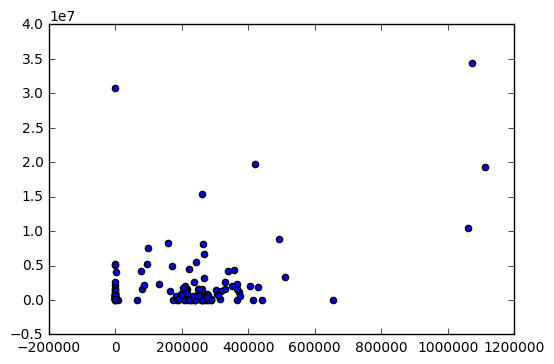

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [6]:
from sklearn.cluster import KMeans

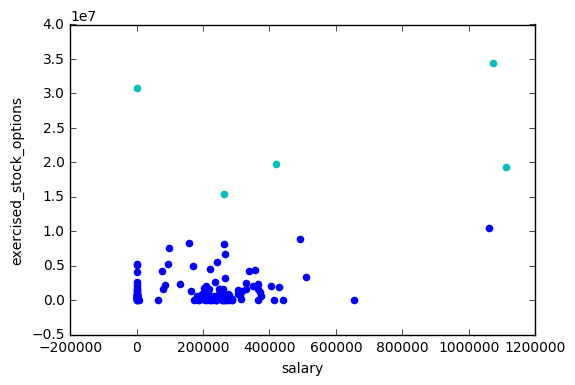

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.labels_
Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)

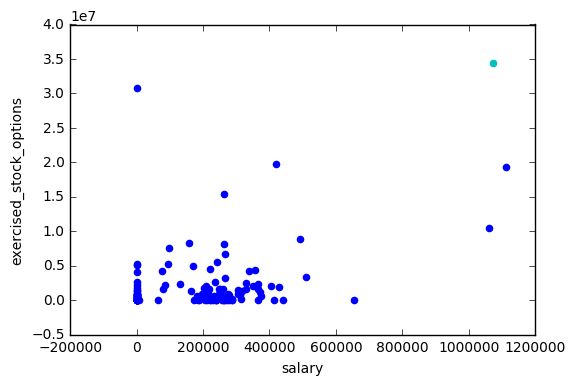

In [10]:
# Rerunning clustering with an additional parameter

features_list = ["poi", feature_1, feature_2, "total_payments"]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.labels_
Draw(pred, finance_features, poi, mark_poi=False, f1_name=feature_1, f2_name=feature_2)

In [14]:
# Looking at range of exercised stock option values
min = 10000000
max = 0
for person in data_dict.values():
    if person['exercised_stock_options'] != 'NaN' and person['exercised_stock_options'] > 0:
        min = person['exercised_stock_options'] if min > person['exercised_stock_options'] and person['exercised_stock_options'] > 0 else min
        max = person['exercised_stock_options'] if max < person['exercised_stock_options'] and person['exercised_stock_options'] > 0 else max
print "Stock option range is [", min, ",", max,"]"

Stock option range is [ 3285 , 34348384 ]


In [16]:
# Looking at range of exercised stock option values
min = 10000000
max = 0
for person in data_dict.values():
    if person['salary'] != 'NaN' and person['salary'] > 0:
        min = person['salary'] if min > person['salary'] and person['salary'] > 0 else min
        max = person['salary'] if max < person['salary'] and person['salary'] > 0 else max
print "Salary range is [$", min, ", $", max,"]"

Salary range is [$ 477 , $ 1111258 ]


In [14]:
# Looking at range of exercised stock option values
min = 10000000
max = 0
for person in data_dict.values():
    if person['exercised_stock_options'] != 'NaN' and person['exercised_stock_options'] > 0:
        min = person['exercised_stock_options'] if min > person['exercised_stock_options'] and person['exercised_stock_options'] > 0 else min
        max = person['exercised_stock_options'] if max < person['exercised_stock_options'] and person['exercised_stock_options'] > 0 else max
print "Stock option range is [", min, ",", max,"]"

Stock option range is [ 3285 , 34348384 ]


## Now with Feature Scaling

In [1]:
from sklearn.preprocessing import MinMaxScaler
salary_scaler = MinMaxScaler()
print "Rescaled salaries", salary_scaler.fit_transform([477.,200000.,1111258.])
print "Rescaled exercised_stock_option", salary_scaler.fit_transform([3258.,1000000.,34348384.])

Rescaled salaries [ 0.          0.17962407  1.        ]
Rescaled salaries [ 0.          0.02902135  1.        ]


/home/rad/ml_week_py2/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/rad/ml_week_py2/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/rad/ml_week_py2/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resha

[array([ 365788.,       0.]),
 array([  267102.,  6680544.]),
 array([  170941.,  4890344.]),
 array([      0.,  651850.]),
 array([  243293.,  5538001.]),
 array([ 267093.,       0.]),
 array([      0.,  493489.]),
 array([  370448.,  1104054.]),
 array([       0.,  5210569.]),
 array([ 197091.,  880290.]),
 array([  130724.,  2282768.]),
 array([ 288589.,       0.]),
 array([ 248546.,  765313.]),
 array([ 257486.,       0.]),
 array([       0.,  2218275.]),
 array([      0.,  372205.]),
 array([ 288542.,       0.]),
 array([  251654.,  1056320.]),
 array([ 288558.,  185063.]),
 array([ 63744.,      0.]),
 array([       0.,  1030329.]),
 array([  357091.,  4346544.]),
 array([ 271442.,   81042.]),
 array([    0.,  3285.]),
 array([  304110.,  1441898.]),
 array([ 187922.,       0.]),
 array([  213625.,  1465734.]),
 array([  249201.,  1635238.]),
 array([     0.,  98718.]),
 array([ 231330.,       0.]),
 array([ 182245.,  601438.]),
 array([ 211788.,       0.]),
 array([      0.,  850